# Task3: Number Recognition
## Handwritten Digit Recognition using MNIST Dataset and Neural Network

## Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

## Load the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

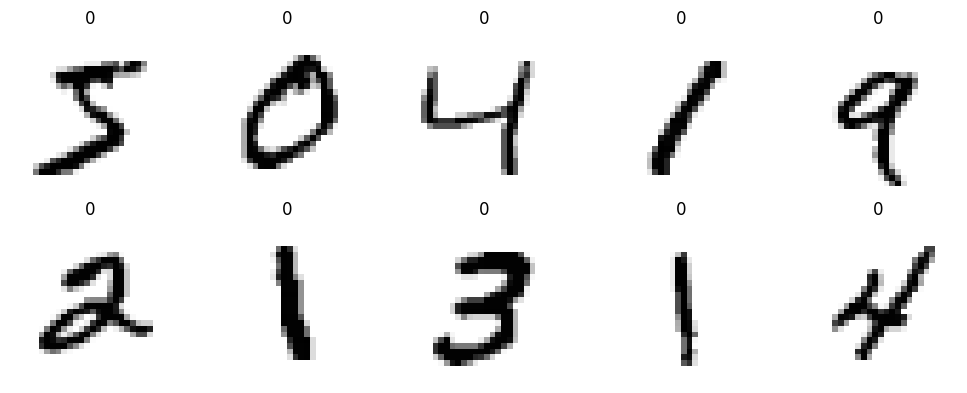

In [3]:
# Visualize input images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='binary')
    plt.title(str(np.argmax(y_train[i])))
    plt.axis('off')
plt.tight_layout()
plt.show()

## Data preprocessing

In [4]:
# Reshape the input images to 1D array (28x28 pixels to 784 pixels)
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32')

In [5]:
# Normalize the pixel values to the range of 0-1
X_train /= 255
X_test /= 255

In [6]:
# One-hot encode the target labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Model training

In [7]:
# Define the Neural Network model
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 9s 26ms/step - loss: 0.3762 - accuracy: 0.8882 - val_loss: 0.1457 - val_accuracy: 0.9552
Epoch 2/10
300/300 [==============================] - 7s 22ms/step - loss: 0.1561 - accuracy: 0.9536 - val_loss: 0.1015 - val_accuracy: 0.9683
Epoch 3/10
300/300 [==============================] - 8s 26ms/step - loss: 0.1107 - accuracy: 0.9662 - val_loss: 0.0841 - val_accuracy: 0.9732
Epoch 4/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0861 - accuracy: 0.9734 - val_loss: 0.0765 - val_accuracy: 0.9753
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0729 - accuracy: 0.9769 - val_loss: 0.0704 - val_accuracy: 0.9776
Epoch 6/10
300/300 [==============================] - 5s 15ms/step - loss: 0.0623 - accuracy: 0.9805 - val_loss: 0.0663 - val_accuracy: 0.9788
Epoch 7/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.0684 - val_accuracy: 0.9799

In [10]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.12%


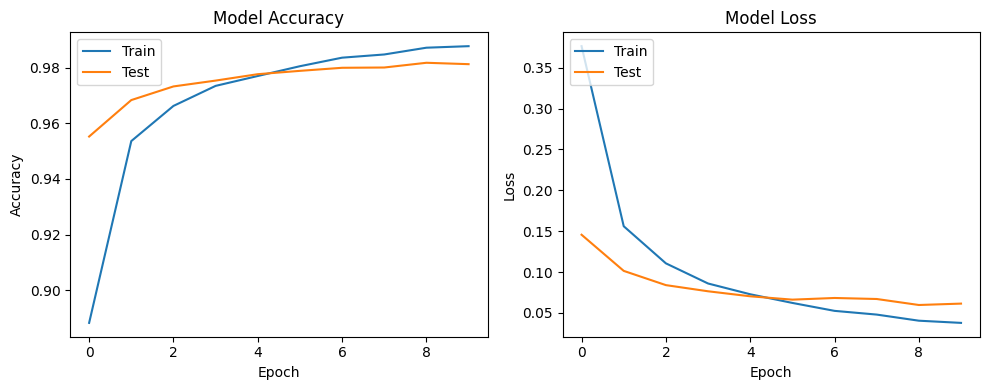

In [11]:
# Finally plotting the accuracy and loss curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()